In [121]:
from numpy import loadtxt
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import pandas as pd
import time
import json
import os 
import shap

import matplotlib.pyplot as plt 

os.chdir('/Users/adrianharris/Desktop/Messy-Data-Project')

path = os.getcwd()


In [111]:
dataset = pd.read_csv('Data/feature_eng_data.csv')

In [112]:
df = dataset.drop("player", axis=1)

df.head()


,level_overall,level_atk,level_def,level_str,level_constiution,level_range,level_prayer,level_magic,level_cooking,level_wood_cutting,...,level_arc,total_xp_overall,cluster,Basic_member_pure,Obby_Mauler_Pure,Black_Pure,Turmoil_Proselyte_Pure,Barrows_Pure,Anti_Pure,Summoning_Tank_Defence
0,2898,99,99,99,99,99,99,99,99,99,...,120,4537236260,1,0,0,0,0,0,0,0
1,1521,65,65,63,65,57,55,64,74,65,...,43,22665814,1,0,0,0,0,0,0,0
2,2898,99,99,99,99,99,99,99,99,99,...,120,5600000000,1,0,0,0,0,0,0,0
3,755,64,1,81,74,1,52,30,38,36,...,1,4669413,1,0,0,0,0,0,0,0
4,2898,99,99,99,99,99,99,99,99,99,...,120,3347652512,2,0,0,0,0,0,0,0


In [114]:
# split data into X and y


X = df.loc[:, ~df.columns.isin(['total_xp_overall', 'level_overall'])]
Y = df.loc[:, 'total_xp_overall']

# Training and Testing data
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


In [125]:
# Linear regression

model = LinearRegression()
model.fit(X, Y)

r_sq = model.score(X, Y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

coefficient of determination: 0.5933386970538044
intercept: -39523032.500848055
slope: [ 9.05331807e+05 -1.70279957e+05  1.65378454e+06 -2.50941354e+06
 -5.92213621e+05 -1.54352866e+06 -4.31605760e+05  5.33815057e+05
  1.04064110e+06 -4.50154950e+05 -4.56869181e+05  2.47781785e+05
 -9.55794708e+05 -1.40083646e+06  4.97273873e+04  4.12349849e+06
 -3.04408853e+06 -1.14287313e+06  5.93712766e+06  6.45166990e+06
  1.37014420e+05 -1.42097116e+06 -2.92384478e+06 -5.58927843e+06
  4.44663815e+06 -4.04352779e+06  5.92435919e+06  3.58278171e+06
  5.01684896e+07 -1.53715872e+07 -1.89372187e+08 -6.68065964e+06
  0.00000000e+00  4.30216521e+06  0.00000000e+00  0.00000000e+00]


In [115]:
xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [117]:
y_pred = xgbr.predict(X_test)
score = xgbr.score(X_train, y_train) 
score

0.878137982227502

In [118]:
scores = cross_val_score(xgbr,X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.85


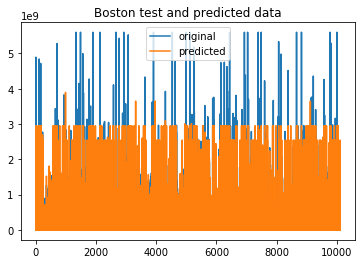

In [119]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


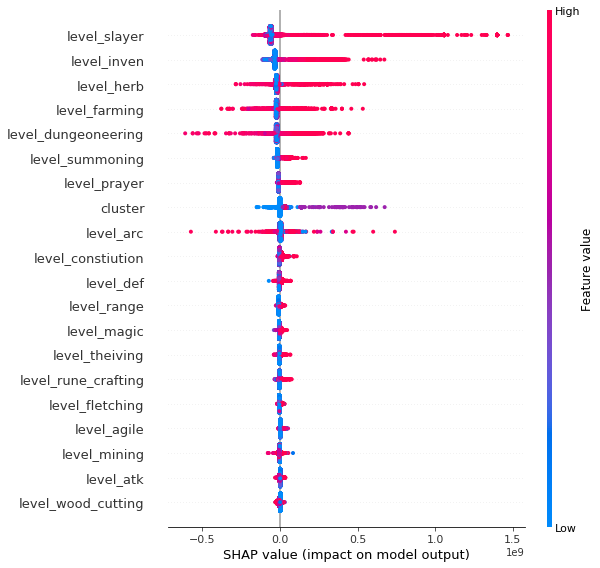

In [120]:
explainer = shap.TreeExplainer(xgbr)
shap_values = explainer.shap_values(X_test)
plot = shap.summary_plot(shap_values,X_test)